# Análise Exploratória Completa do US Accidents
Este notebook apresenta uma análise detalhada das variáveis do dataset US Accidents e sua relação com a severidade dos acidentes, incluindo visualizações univariadas, bivariadas, análise temporal, correlação e demonstração de density estimation.

In [1]:
#%pip install pandas numpy matplotlib seaborn scikit-learn kagglehub
# Imports básicos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
from sklearn.neighbors import KernelDensity
import zipfile, os
import kagglehub

# Instalação das bibliotecas necessárias


sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)


c:\Users\joaou\Documents\Insper\6_semestre\ML\Machine_Learning_Projeto\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
with zipfile.ZipFile("archive.zip", 'r') as z:
    z.extractall("data_us_accidents")
csv_file = [f for f in os.listdir("data_us_accidents") if f.endswith(".csv")][0]


In [ ]:
# Leitura
# df = pd.read_csv("data_us_accidents/US_Accidents_March23.csv", parse_dates=["Start_Time"])

In [ ]:
# df.to_pickle("data_us_accidents/accidents.pkl")

In [ ]:
df = pd.read_pickle("accidents.pkl")

## 1. Visão Geral dos Dados

In [3]:
df.shape, df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

((7728394, 46),
 None,
     ID   Source  Severity           Start_Time             End_Time  \
 0  A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
 1  A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
 2  A-3  Source2         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
 3  A-4  Source2         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
 4  A-5  Source2         2  2016-02-08 07:39:07  2016-02-08 08:09:07   
 
    Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  ... Roundabout  \
 0  39.865147 -84.058723      NaN      NaN          0.01  ...      False   
 1  39.928059 -82.831184      NaN      NaN          0.01  ...      False   
 2  39.063148 -84.032608      NaN      NaN          0.01  ...      False   
 3  39.747753 -84.205582      NaN      NaN          0.01  ...      False   
 4  39.627781 -84.188354      NaN      NaN          0.01  ...      False   
 
   Station   Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
 0   

## 3. Estatísticas Descritivas

In [4]:
df.describe().T

count       mean        std         min         25%  \
Severity           7728394.0   2.212384   0.487531    1.000000    2.000000   
Start_Lat          7728394.0  36.201195   5.076079   24.554800   33.399631   
Start_Lng          7728394.0 -94.702545  17.391756 -124.623833 -117.219396   
End_Lat            4325632.0  36.261829   5.272905   24.566013   33.462070   
End_Lng            4325632.0 -95.725570  18.107928 -124.545748 -117.754345   
Distance(mi)       7728394.0   0.561842   1.776811    0.000000    0.000000   
Temperature(F)     7564541.0  61.663286  19.013653  -89.000000   49.000000   
Wind_Chill(F)      5729375.0  58.251048  22.389832  -89.000000   43.000000   
Humidity(%)        7554250.0  64.831041  22.820968    1.000000   48.000000   
Pressure(in)       7587715.0  29.538986   1.006190    0.000000   29.370000   
Visibility(mi)     7551296.0   9.090376   2.688316    0.000000   10.000000   
Wind_Speed(mph)    7157161.0   7.685490   5.424983    0.000000    4.600000   
Precipitation(in)  5524808.0   0.008407   0.110225    0.000000    0.000000   

                         50%        75%          max  
Severity            2.000000   2.000000     4.000000  
Start_Lat          35.823974  40.084959    49.002201  
Start_Lng         -87.766616 -80.353676   -67.113167  
End_Lat            36.183495  40.178920    49.075000  
End_Lng           -88.027890 -80.247086   -67.109242  
Distance(mi)        0.030000   0.464000   441.750000  
Temperature(F)     64.000000  76.000000   207.000000  
Wind_Chill(F)      62.000000  75.000000   207.000000  
Humidity(%)        67.000000  84.000000   100.000000  
Pressure(in)       29.860000  30.030000    58.630000  
Visibility(mi)     10.000000  10.000000   140.000000  
Wind_Speed(mph)     7.000000  10.400000  1087.000000  
Precipitation(in)   0.000000   0.000000    36.470000

## 4. Distribuições Univariadas de Variáveis Numéricas

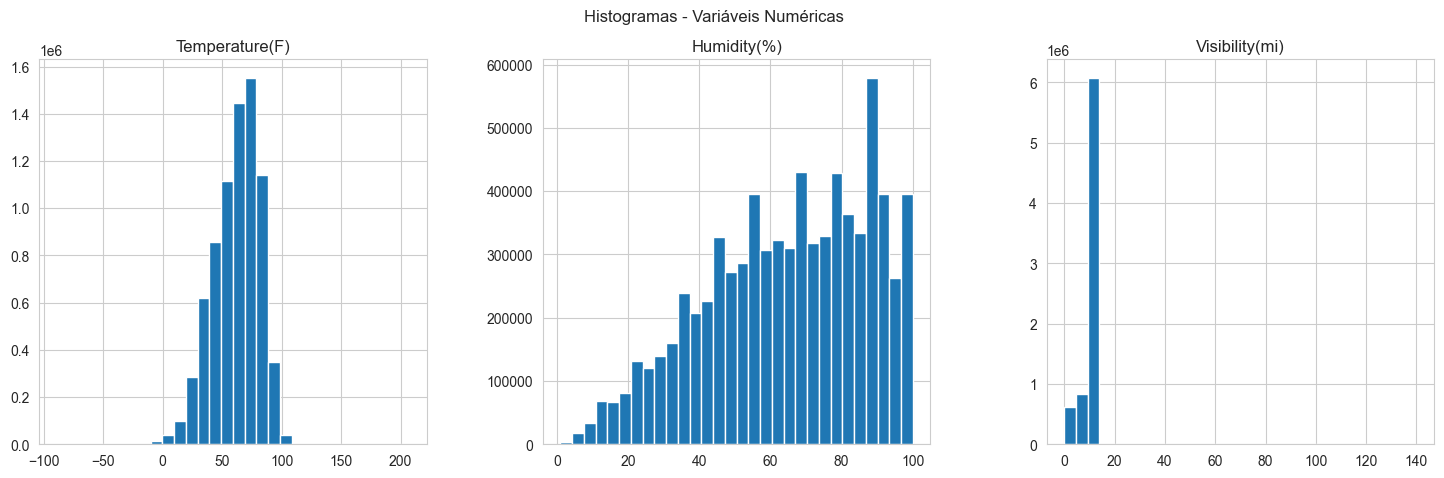

In [5]:
numeric_cols = ["Temperature(F)", "Humidity(%)", "Visibility(mi)"]
df[numeric_cols].hist(bins=30, layout=(1,3), figsize=(18,5))
plt.suptitle("Histogramas - Variáveis Numéricas")
plt.show()


## 5. Boxplots para Outliers

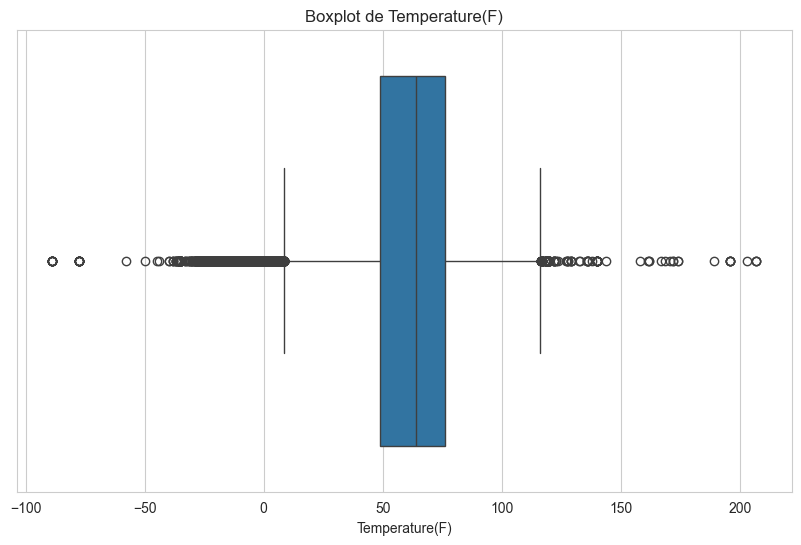

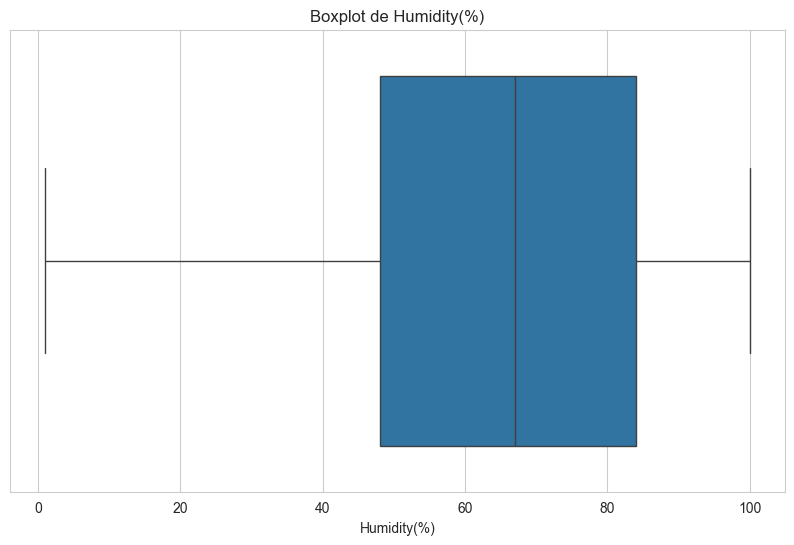

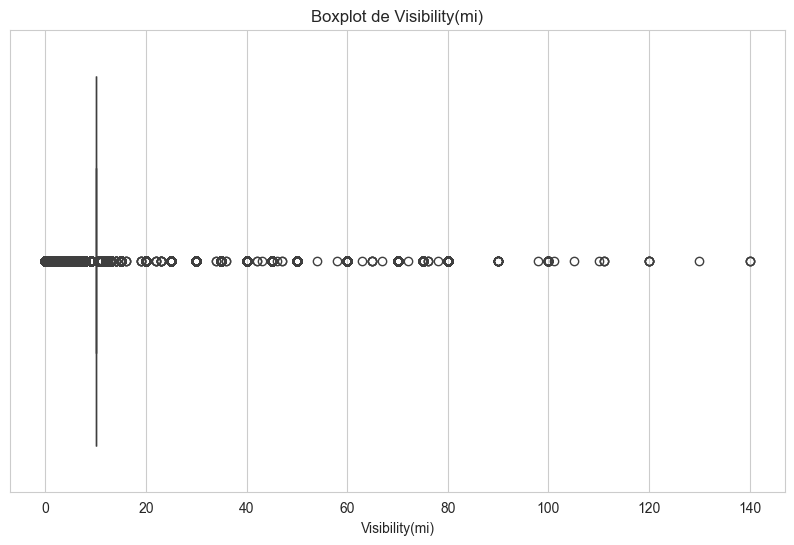

In [6]:
for col in numeric_cols:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot de {col}")
    plt.show()


## 6. Variáveis Categóricas

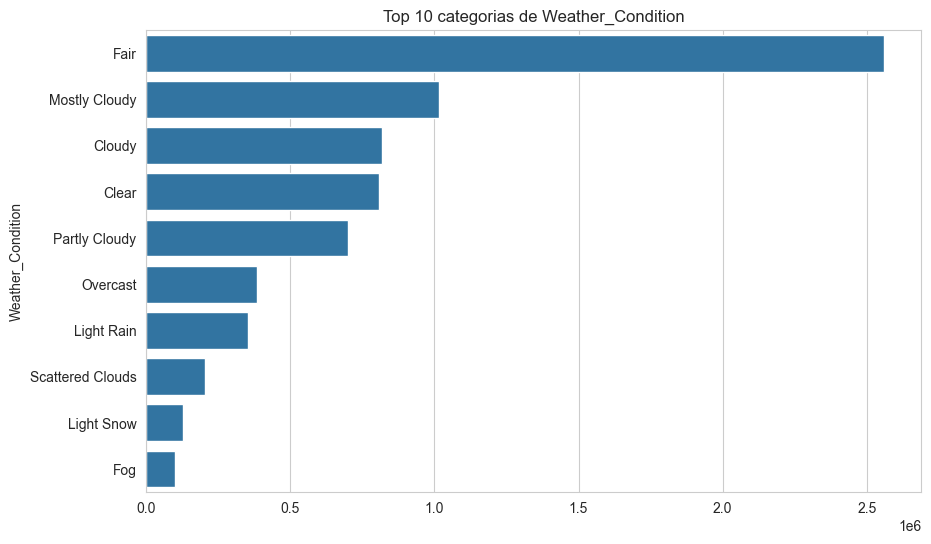

In [7]:
categorical_cols = ["Severity", "Weather_Condition", "City", "State"]
for col in ["Weather_Condition"]:
    top = df[col].value_counts().nlargest(10)
    sns.barplot(x=top.values, y=top.index)
    plt.title(f"Top 10 categorias de {col}")
    plt.show()


## 8. Correlação entre Variáveis Numéricas

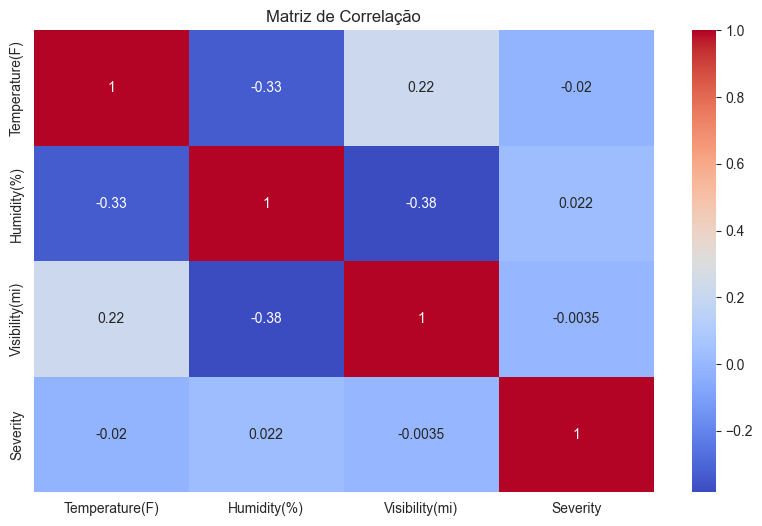

In [9]:
corr = df[numeric_cols + ['Severity']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlação")
plt.show()


## 9. Relação das Variáveis com Severity

In [10]:
# Média de cada numérica por nível de severidade
mean_by_sev = df.groupby('Severity')[numeric_cols].mean()
mean_by_sev

Temperature(F)  Humidity(%)  Visibility(mi)
Severity                                             
1              72.417672    61.907452        9.475379
2              61.547184    64.665645        9.086604
3              62.201117    65.381389        9.092717
4              58.141514    67.301981        9.060768

### Gráfico de Linhas - Médias por Severidade

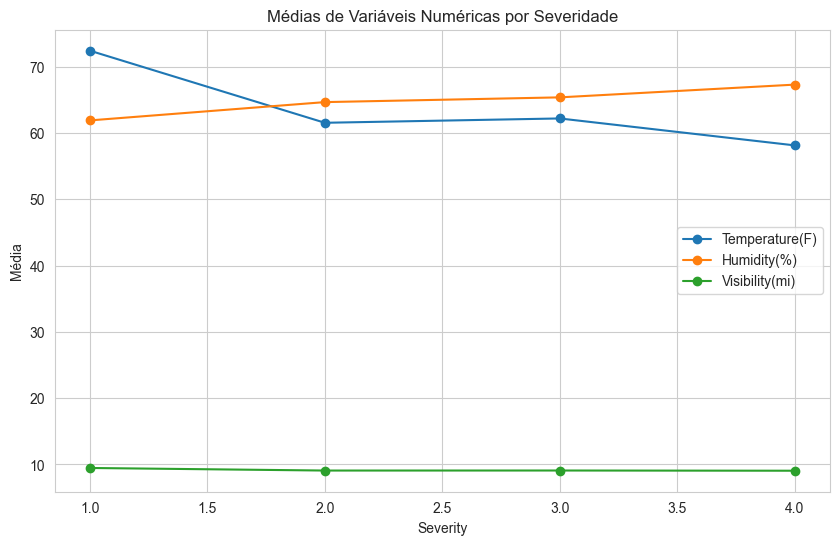

In [11]:
mean_by_sev.plot(marker='o')
plt.title("Médias de Variáveis Numéricas por Severidade")
plt.xlabel("Severity")
plt.ylabel("Média")
plt.show()


## 10. Estimação de Densidade (make_moons)

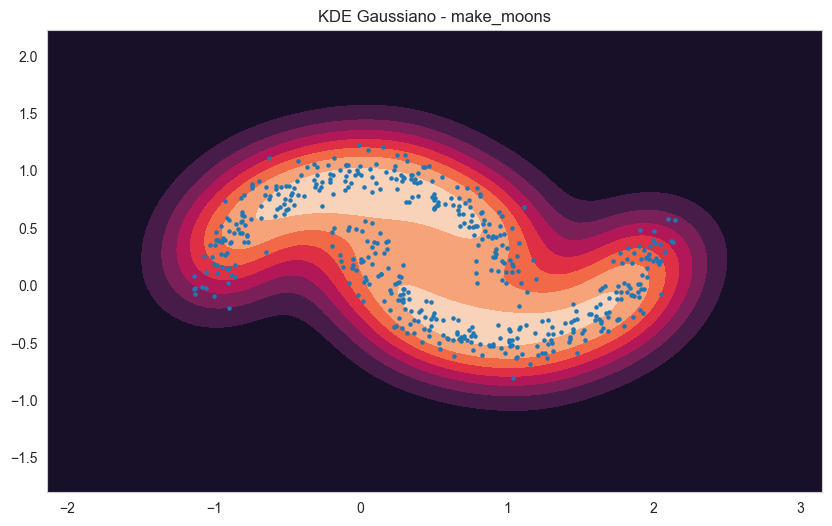

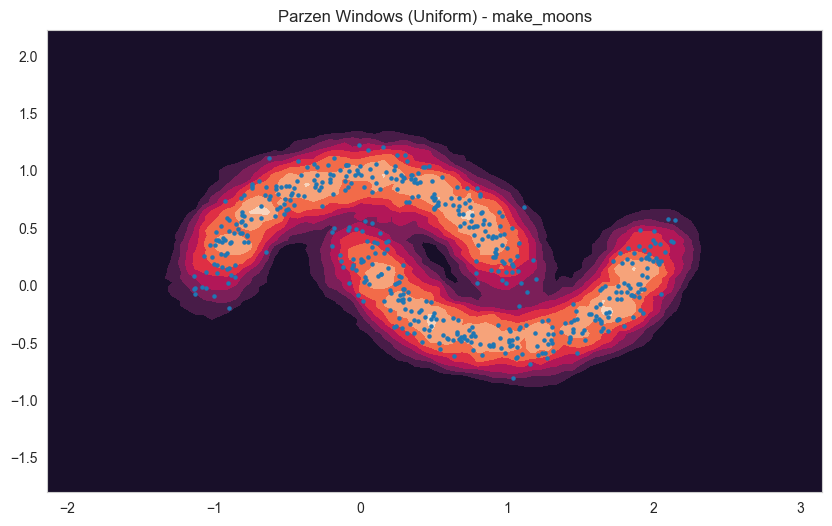

In [8]:
# Dataset de exemplo
X, y = make_moons(n_samples=500, noise=0.1, random_state=0)
kde_gauss = KernelDensity(kernel='gaussian', bandwidth=0.3).fit(X)
kde_uniform = KernelDensity(kernel='tophat', bandwidth=0.3).fit(X)

# Grid para visualização
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
grid = np.vstack([xx.ravel(), yy.ravel()]).T

# Plot KDE
plt.contourf(xx, yy, np.exp(kde_gauss.score_samples(grid)).reshape(xx.shape))
plt.scatter(X[:,0], X[:,1], s=5)
plt.title("KDE Gaussiano - make_moons")
plt.show()

plt.contourf(xx, yy, np.exp(kde_uniform.score_samples(grid)).reshape(xx.shape))
plt.scatter(X[:,0], X[:,1], s=5)
plt.title("Parzen Windows (Uniform) - make_moons")
plt.show()


# Estimação da PDF

In [ ]:
df_orig = df.copy()

In [28]:
df = df_orig.copy()
df_clean = df[['Start_Lat','Start_Lng','Temperature(F)','Humidity(%)']].dropna()

from sklearn.neighbors import KernelDensity

features_completo = df_clean.values
p_completo = KernelDensity(kernel='tophat', bandwidth=0.1).fit(features_completo)

features_redux = df_clean[["Temperature(F)", "Humidity(%)"]].values
p_redux = KernelDensity(kernel='tophat', bandwidth=0.1).fit(features_redux)

# Avaliação da densidade
log_dens_completo  = p_completo.score_samples(features_completo)
log_dens_redux = p_redux.score_samples(features_redux)


X_acc_TH = df_clean[['Temperature(F)','Humidity(%)']].values
kde_acc_TH = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(X_acc_TH)



In [29]:
log_ratio = log_dens_completo - log_dens_redux
# corresponde a log P(acidente|lat,lng,T,H) – log P(acidente|T,H)
print("Log-Ratio:\n", log_ratio[:10])

Log-Ratio:
 [-1.11169003 -1.10910271 -1.46681339 -2.53476723  0.44001541 -0.66669408
 -1.20613851 -1.52658513  1.51453015 -0.44153237]


In [30]:
# Para visualizar em heatmap espacial, fixamos T e H em valores médios
T_med = df_clean['Temperature(F)'].mean()
H_med = df_clean['Humidity(%)'].mean()

# grid
lat_lin = np.linspace(df_clean.Start_Lat.min(), df_clean.Start_Lat.max(), 200)
lng_lin = np.linspace(df_clean.Start_Lng.min(), df_clean.Start_Lng.max(), 200)
lat_g, lng_g = np.meshgrid(lat_lin, lng_lin)


pts = np.vstack([
    lat_g.ravel(),
    lng_g.ravel(),
    np.full(lat_g.size, T_med),
    np.full(lat_g.size, H_med)
]).T  


log_completo = p_completo.score_samples(pts)
log_redux = p_redux.score_samples(pts[:, 2:4])  # só T e H
log_heat = log_completo - log_redux


C:\Users\joaou\AppData\Local\Temp\ipykernel_24828\2201466751.py:21: RuntimeWarning: invalid value encountered in subtract
  log_heat = log_completo - log_redux


In [31]:
np.unique(log_redux)

array([-inf])

In [32]:
df_clean["Start_Lng"].values.ravel()

array([ -80.11936 , -121.26582 ,  -84.269348, ...,  -82.375168,
        -82.417435, -121.28849 ], shape=(977513,))

In [33]:
log_ratio

array([-1.11169003, -1.10910271, -1.46681339, ..., -1.92863143,
       -0.41595553, -0.65859687], shape=(977513,))

In [34]:
s = log_dens_completo
s = (s-s.min())/(s.max()-s.min())

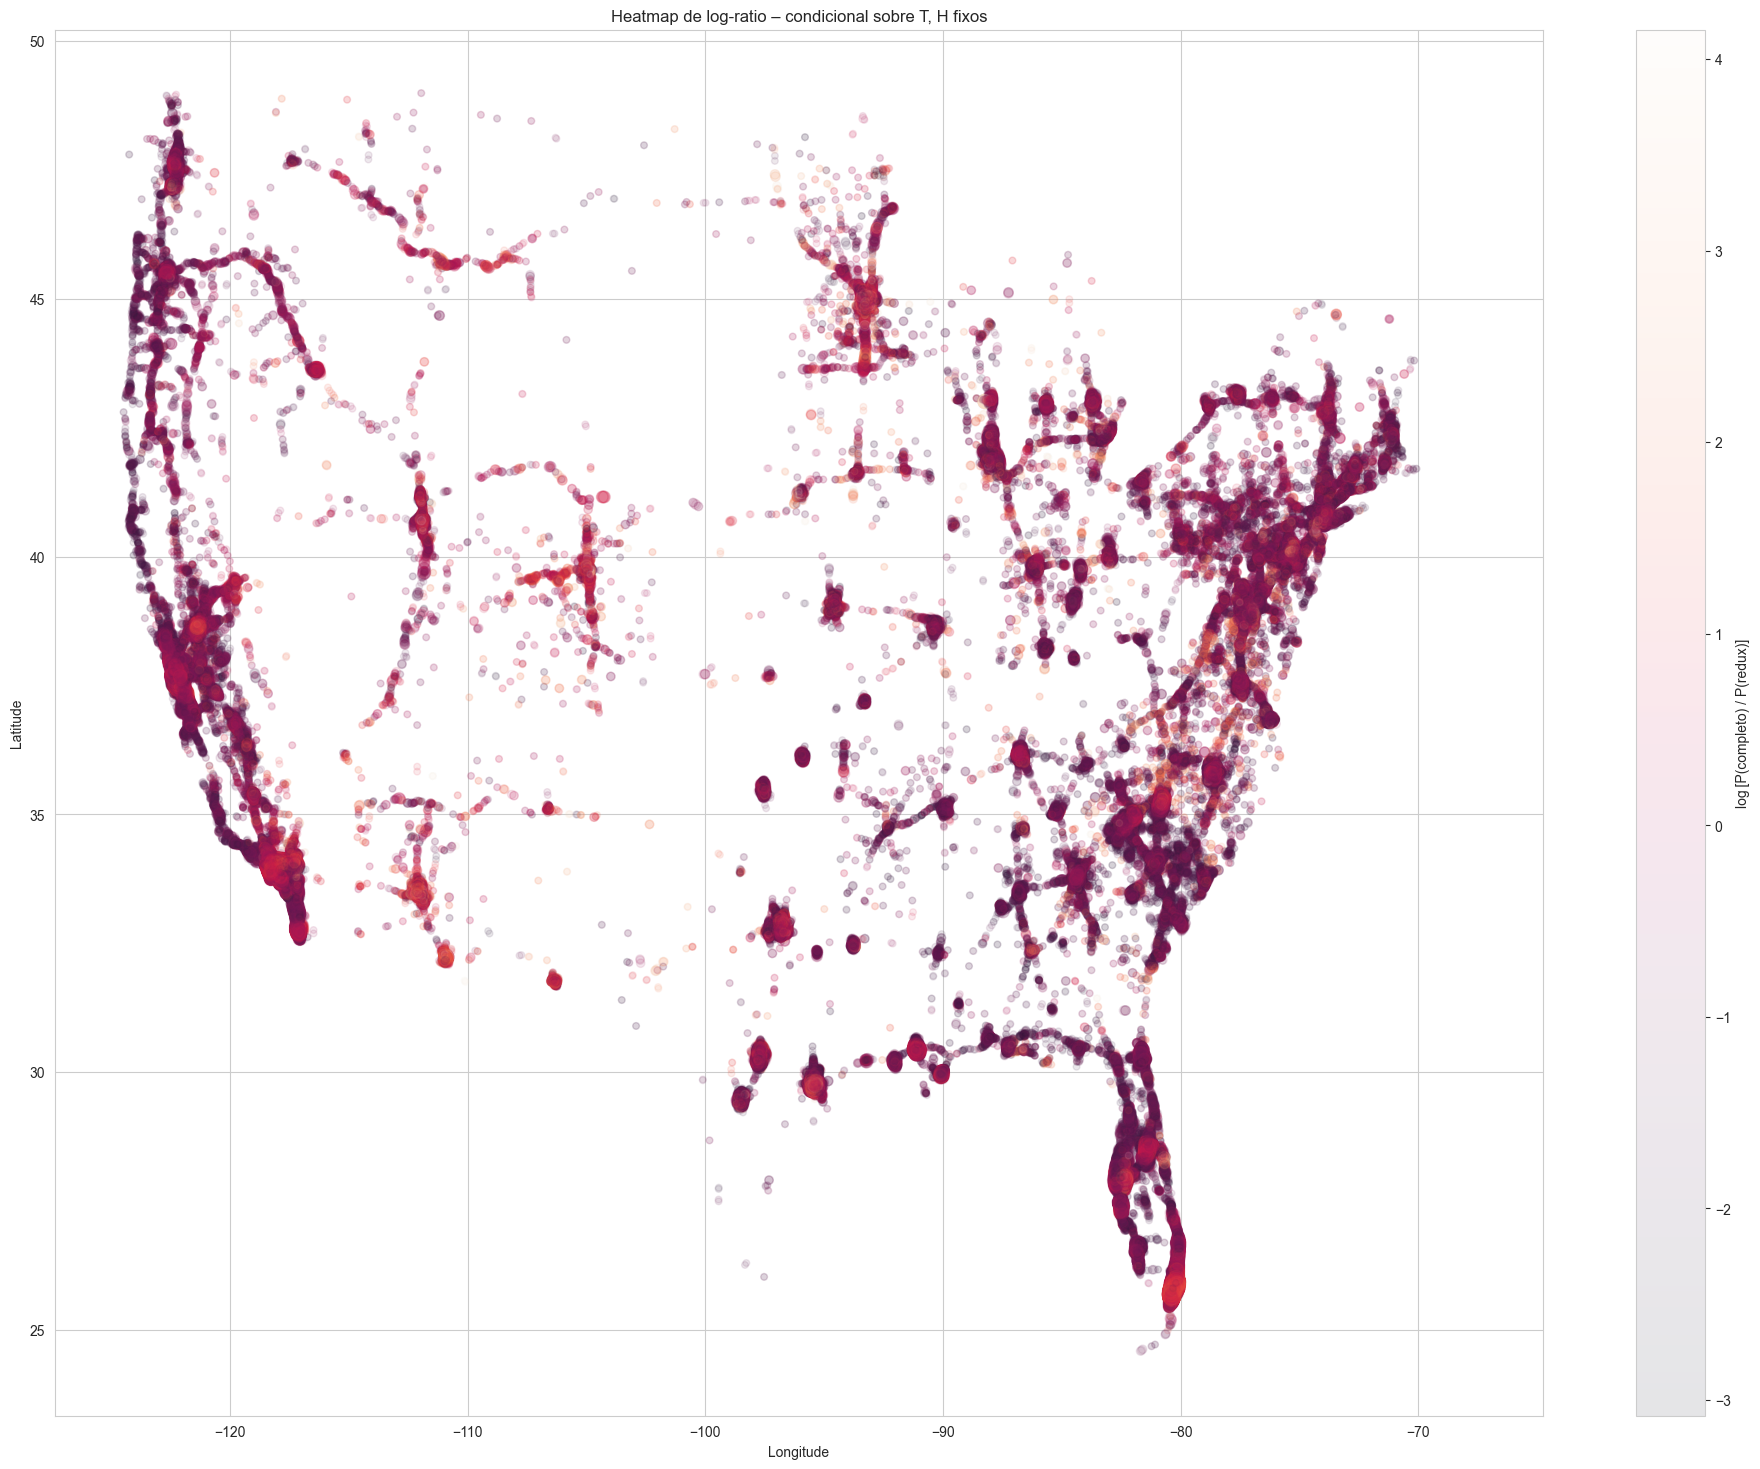

<Figure size 1000x600 with 0 Axes>

In [35]:

# 6) Desenha o heatmap
plt.figure(figsize=(24,18))
#plt.contourf(, df_clean["Start_Lat"].values.ravel(), log_ratio)
plt.scatter(df_clean.Start_Lng, df_clean.Start_Lat, s=s*150, c=log_ratio, alpha=0.1)
plt.colorbar(label='log [P(completo) / P(redux)]')
plt.title("Heatmap de log-ratio – condicional sobre T, H fixos")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

plt.savefig("heatmap_log_ratio.png", dpi=700)

In [ ]:
import joblib
np.save("lat_grid.npy", lat_g)   # não salve lat_lin
np.save("lng_grid.npy", lng_g)   # não salve lng_lin
joblib.dump(p_completo, "kde_completo.pkl")
joblib.dump(p_redux, "kde_redux.pkl")

C:\Users\joaou\AppData\Local\Temp\ipykernel_24828\3030501772.py:24: RuntimeWarning: invalid value encountered in subtract
  log_heat = log_completo - log_redux


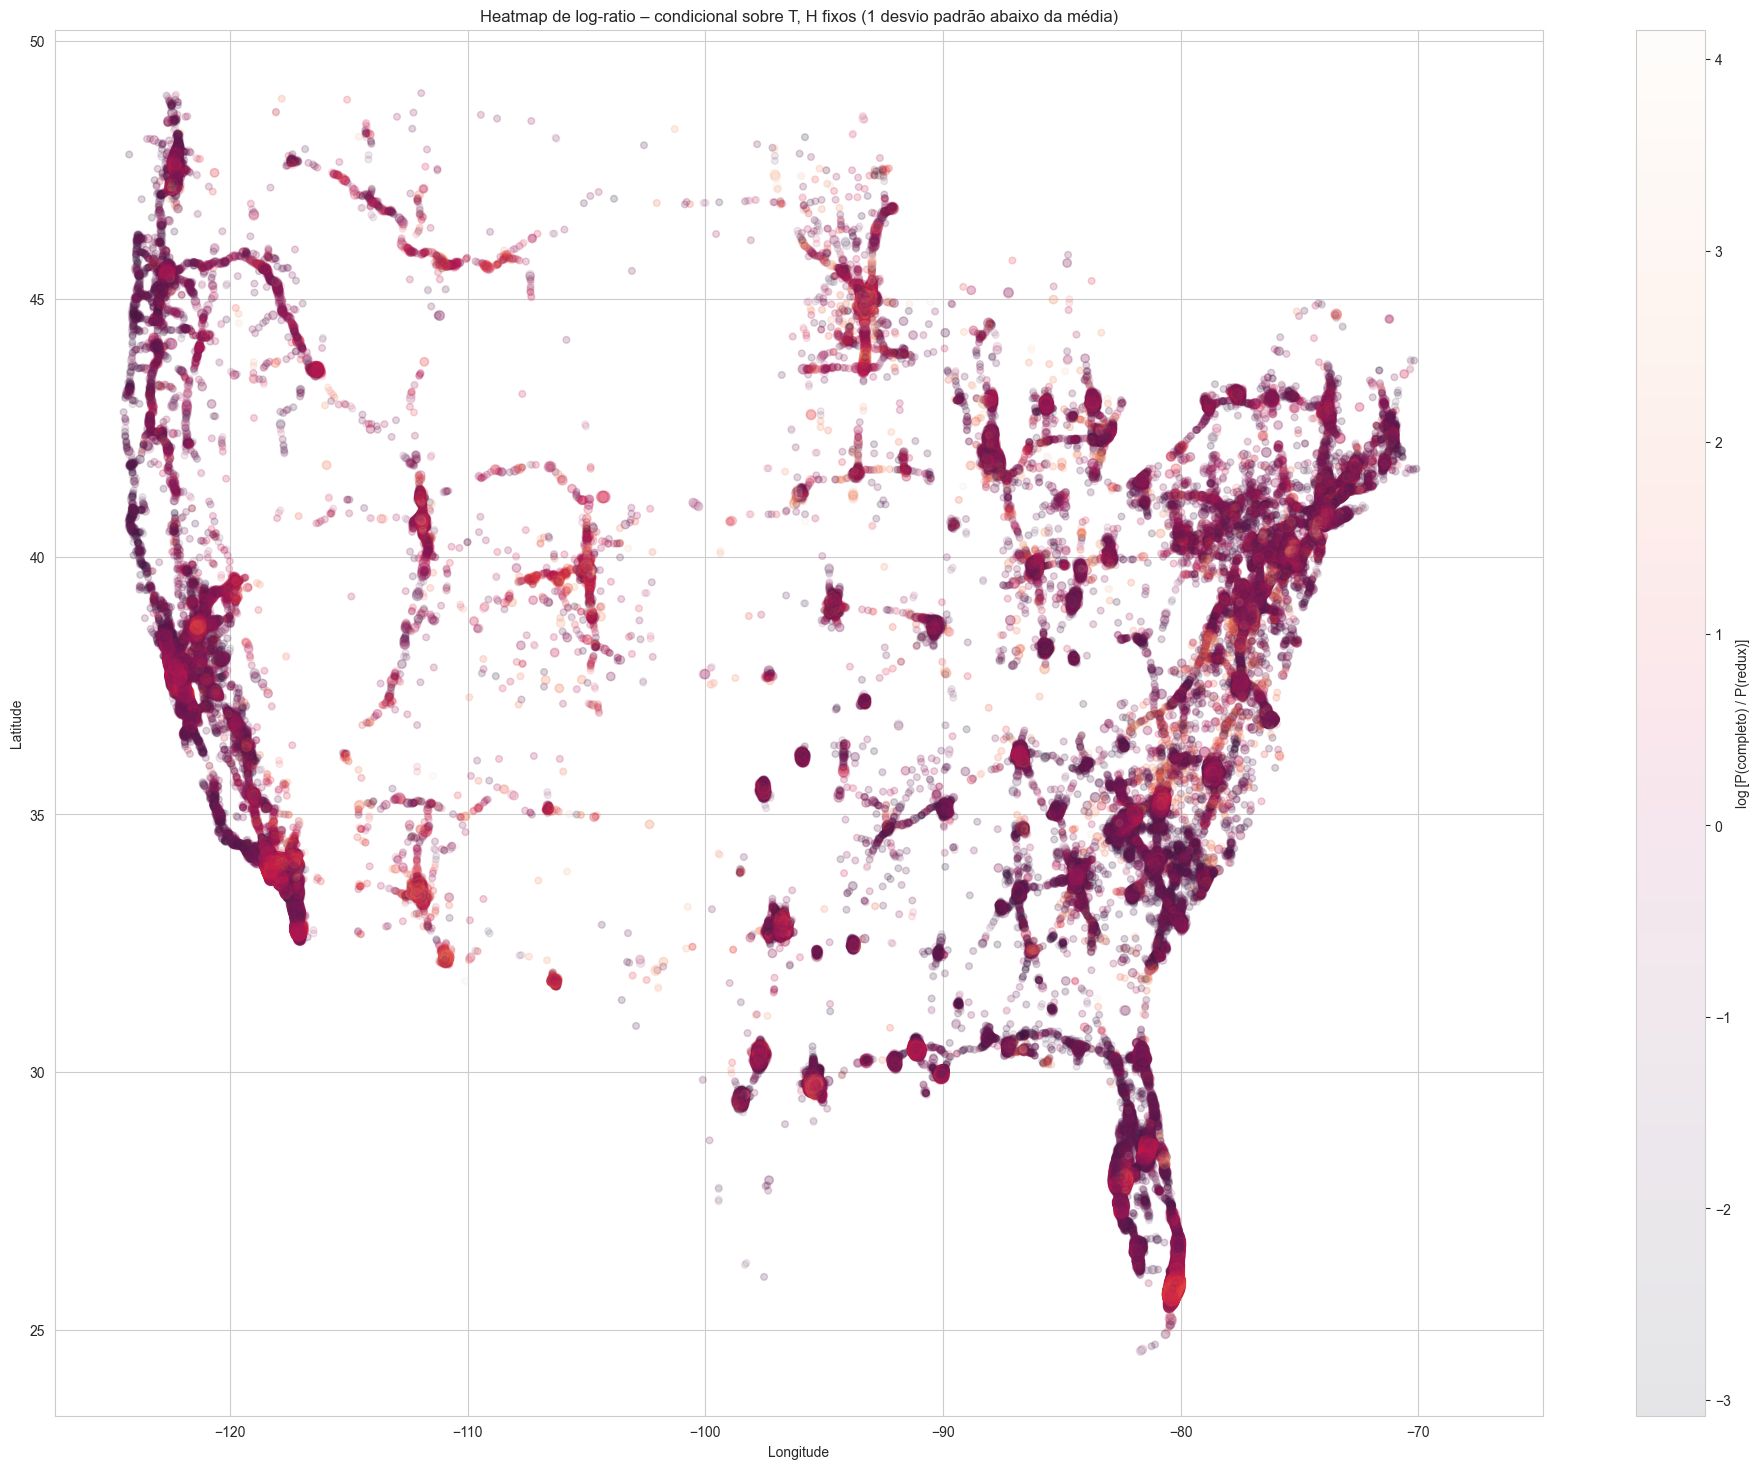

<Figure size 1000x600 with 0 Axes>

In [36]:
# Para visualizar em heatmap espacial, fixamos T e H em valores médios
# Seleciona valores 1 desvio padrão abaixo da média
T_med = df_clean['Temperature(F)'].mean() - df_clean['Temperature(F)'].std()
H_med = df_clean['Humidity(%)'].mean() - df_clean['Humidity(%)'].std()



# grid
lat_lin = np.linspace(df_clean.Start_Lat.min(), df_clean.Start_Lat.max(), 200)
lng_lin = np.linspace(df_clean.Start_Lng.min(), df_clean.Start_Lng.max(), 200)
lat_g, lng_g = np.meshgrid(lat_lin, lng_lin)


pts = np.vstack([
    lat_g.ravel(),
    lng_g.ravel(),
    np.full(lat_g.size, T_med),
    np.full(lat_g.size, H_med)
]).T  


log_completo = p_completo.score_samples(pts)
log_redux = p_redux.score_samples(pts[:, 2:4])  # só T e H
log_heat = log_completo - log_redux

s = log_dens_completo
s = (s-s.min())/(s.max()-s.min())



# 6) Desenha o heatmap
plt.figure(figsize=(24,18))
#plt.contourf(, df_clean["Start_Lat"].values.ravel(), log_ratio)
plt.scatter(df_clean.Start_Lng, df_clean.Start_Lat, s=s*150, c=log_ratio, alpha=0.1)
plt.colorbar(label='log [P(completo) / P(redux)]')
plt.title("Heatmap de log-ratio – condicional sobre T, H fixos (1 desvio padrão abaixo da média)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

plt.savefig("heatmap_log_ratio_abaixo.png", dpi=700)

C:\Users\joaou\AppData\Local\Temp\ipykernel_24828\2202259443.py:24: RuntimeWarning: invalid value encountered in subtract
  log_heat = log_completo - log_redux


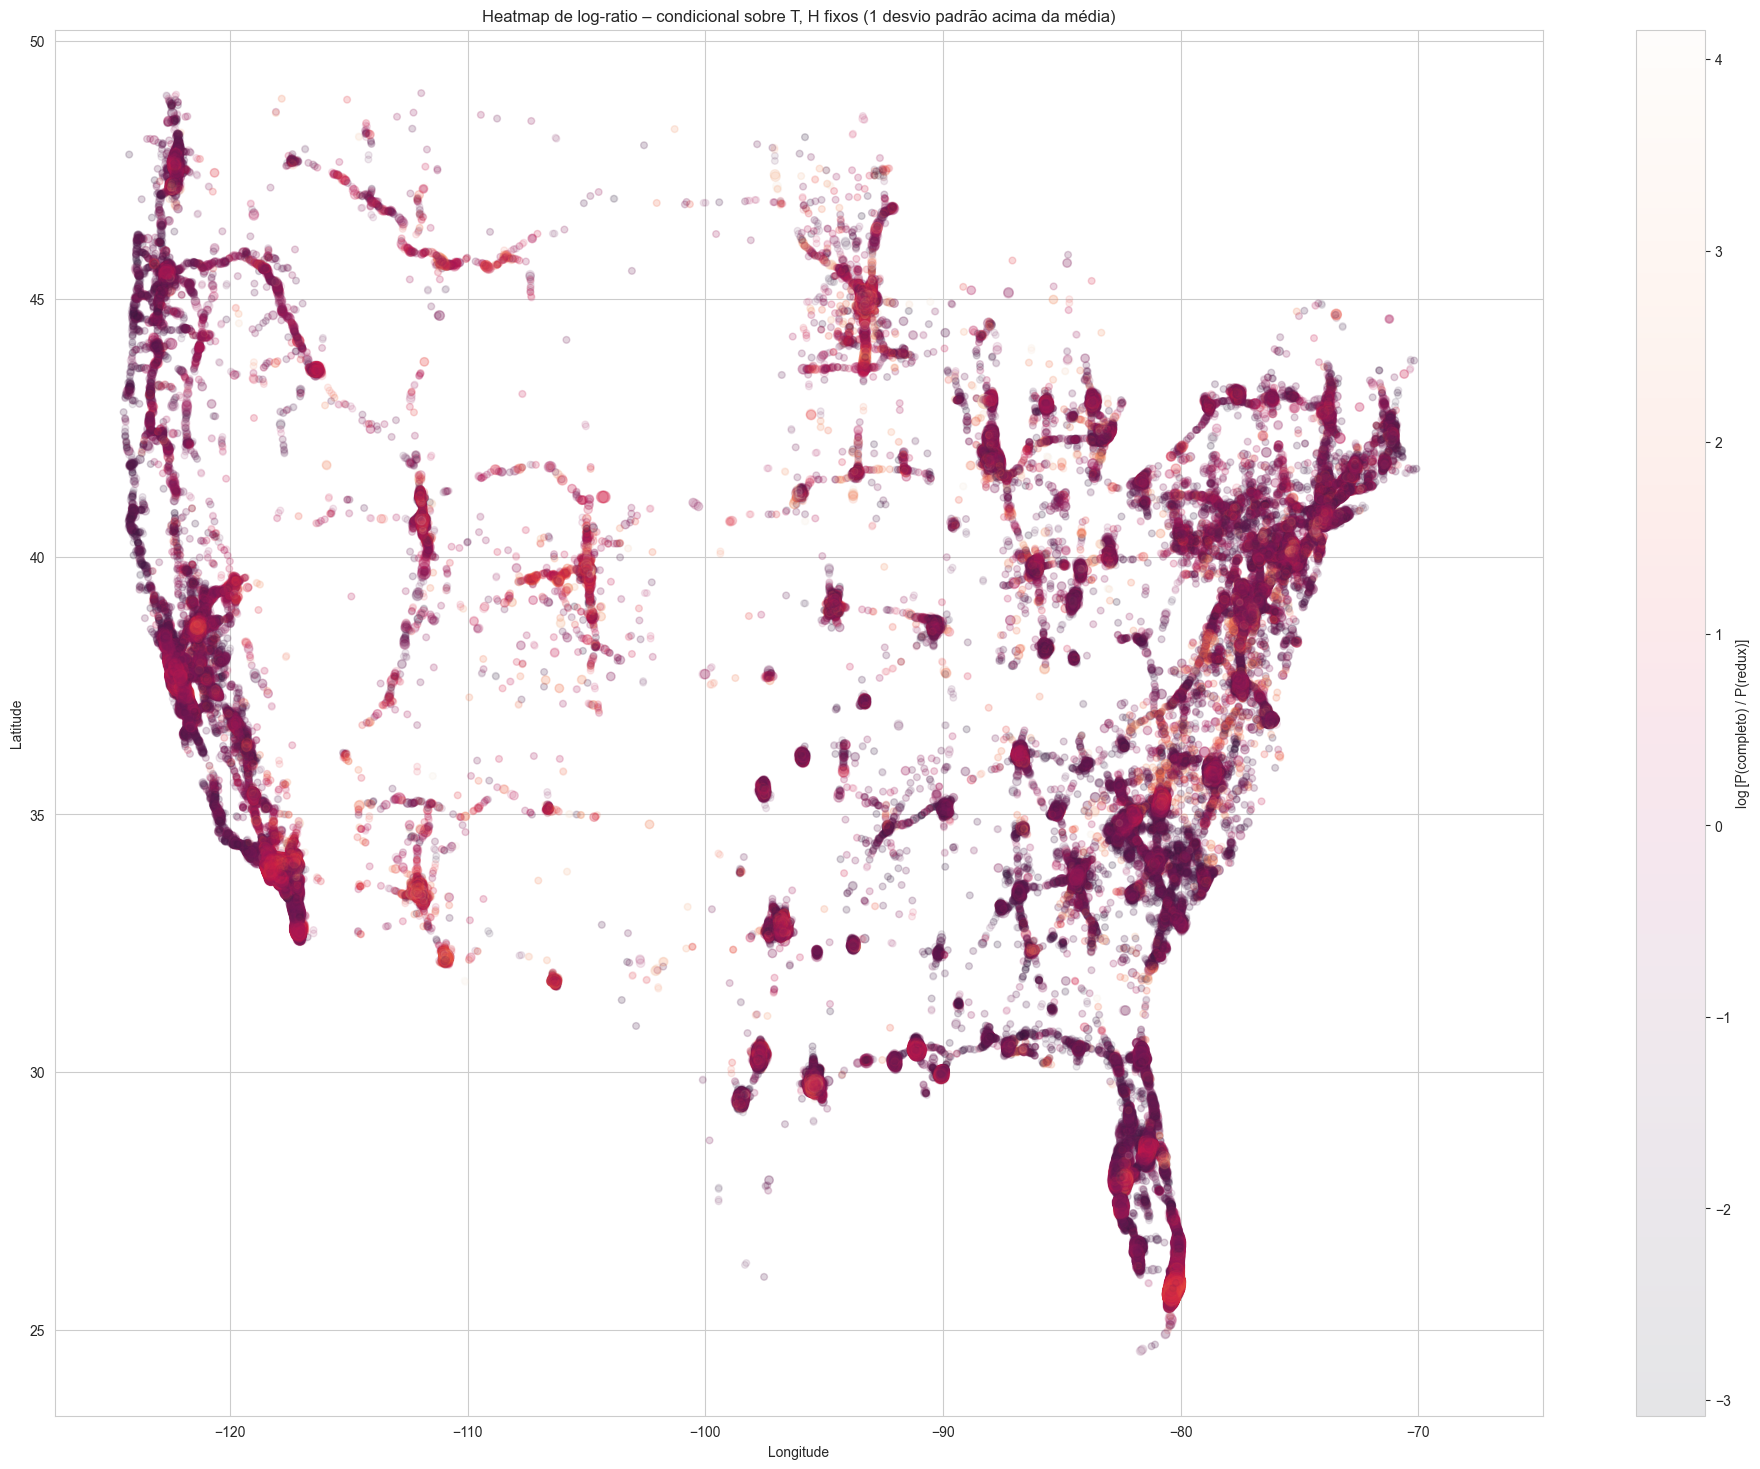

<Figure size 1000x600 with 0 Axes>

In [37]:
# Para visualizar em heatmap espacial, fixamos T e H em valores médios
# Seleciona valores 1 desvio padrão abaixo da média
T_med = df_clean['Temperature(F)'].mean() + df_clean['Temperature(F)'].std()
H_med = df_clean['Humidity(%)'].mean() + df_clean['Humidity(%)'].std()



# grid
lat_lin = np.linspace(df_clean.Start_Lat.min(), df_clean.Start_Lat.max(), 200)
lng_lin = np.linspace(df_clean.Start_Lng.min(), df_clean.Start_Lng.max(), 200)
lat_g, lng_g = np.meshgrid(lat_lin, lng_lin)


pts = np.vstack([
    lat_g.ravel(),
    lng_g.ravel(),
    np.full(lat_g.size, T_med),
    np.full(lat_g.size, H_med)
]).T  


log_completo = p_completo.score_samples(pts)
log_redux = p_redux.score_samples(pts[:, 2:4])  # só T e H
log_heat = log_completo - log_redux

s = log_dens_completo
s = (s-s.min())/(s.max()-s.min())



# 6) Desenha o heatmap
plt.figure(figsize=(24,18))
#plt.contourf(, df_clean["Start_Lat"].values.ravel(), log_ratio)
plt.scatter(df_clean.Start_Lng, df_clean.Start_Lat, s=s*150, c=log_ratio, alpha=0.1)
plt.colorbar(label='log [P(completo) / P(redux)]')
plt.title("Heatmap de log-ratio – condicional sobre T, H fixos (1 desvio padrão acima da média)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

plt.savefig("heatmap_log_ratio_acima.png", dpi=700)

C:\Users\joaou\AppData\Local\Temp\ipykernel_24828\2871423657.py:56: RuntimeWarning: invalid value encountered in subtract
  log_heat = log_completo - log_redux


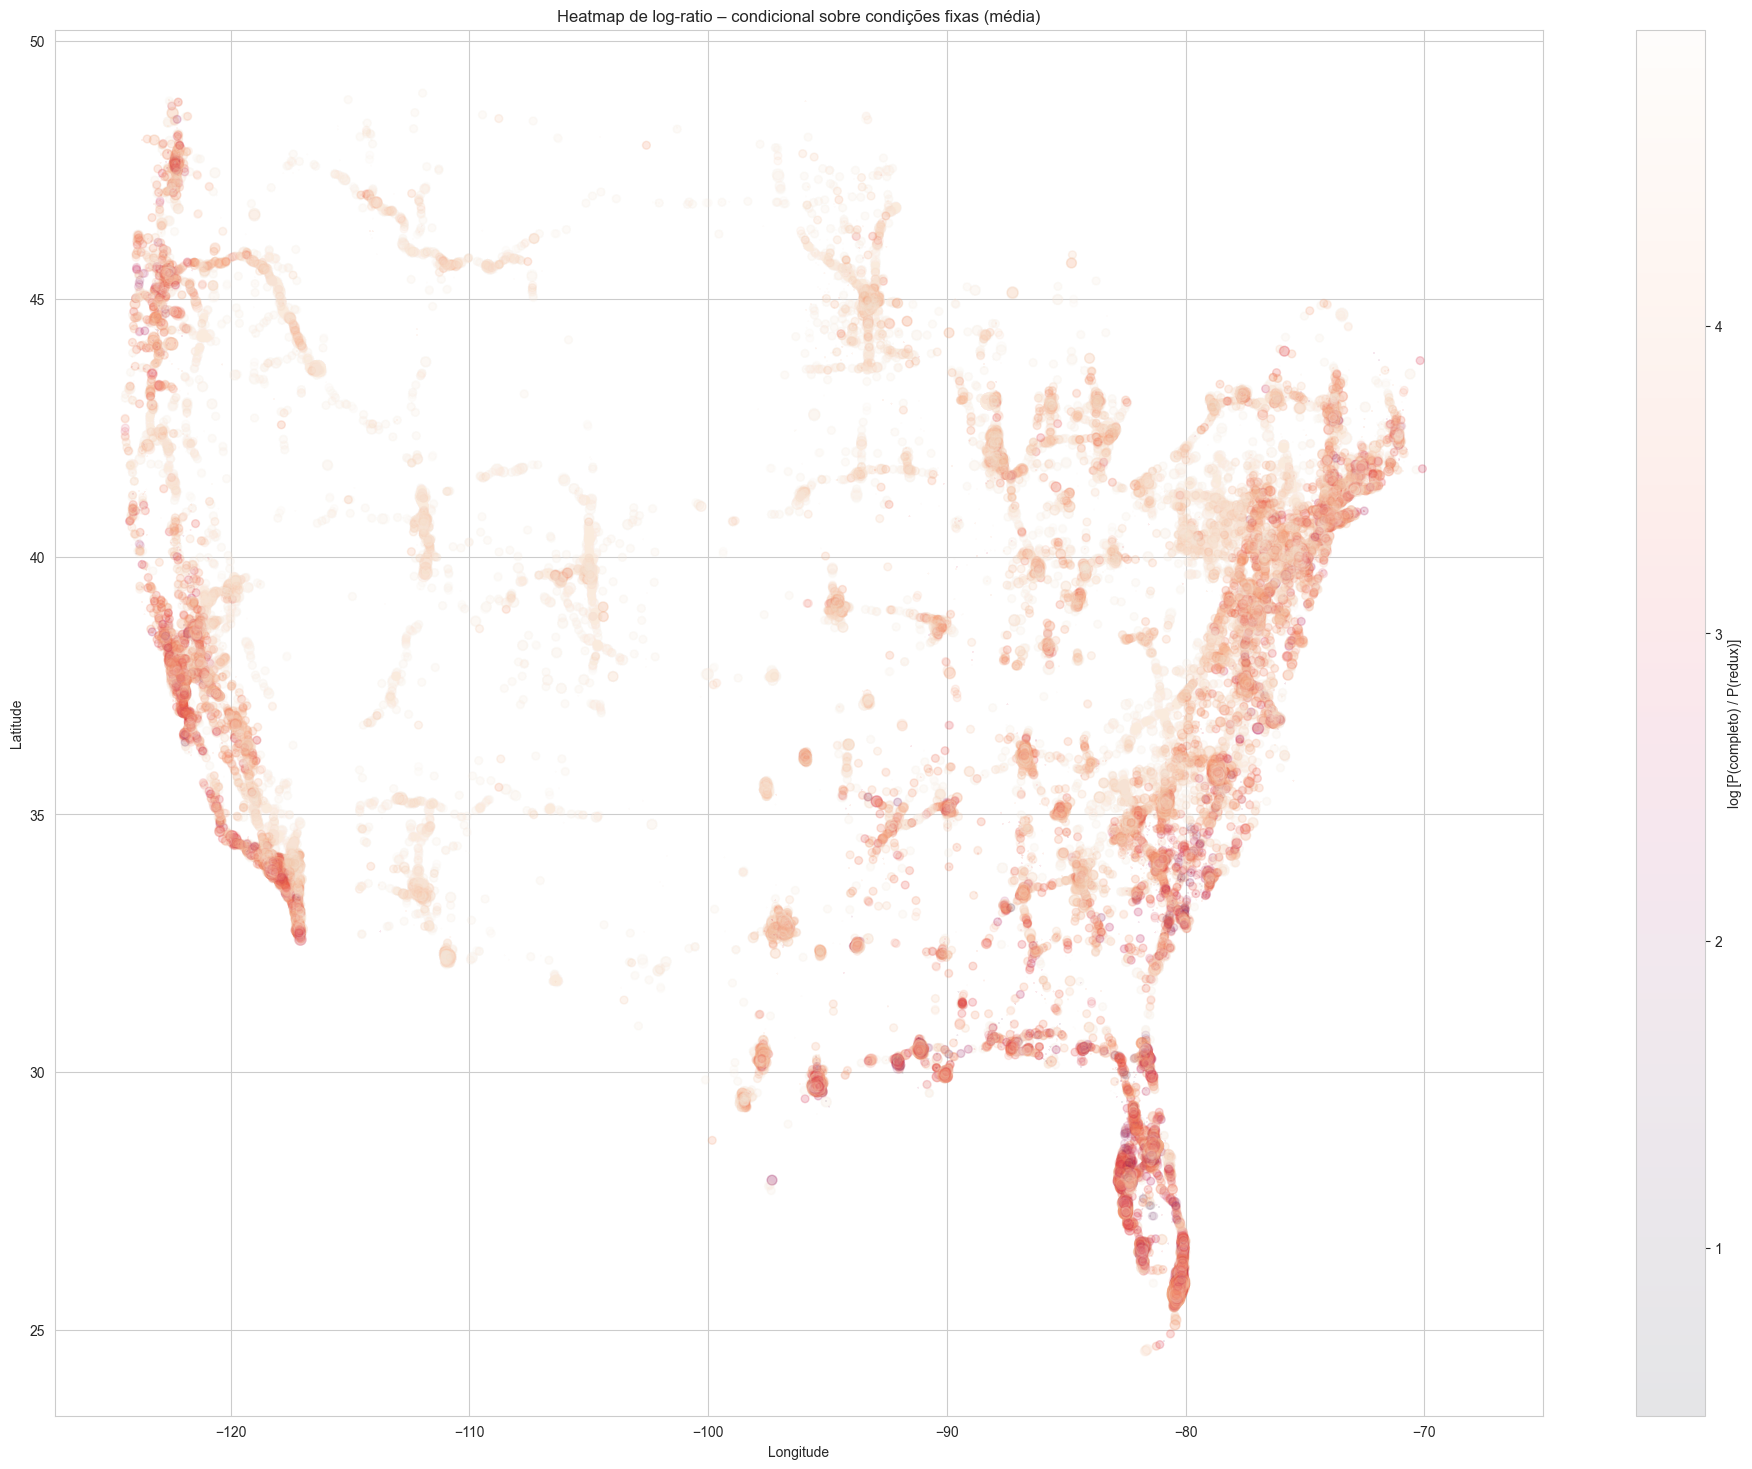

<Figure size 1000x600 with 0 Axes>

In [42]:
df = df_orig.copy()
df_clean = df[['Start_Lat','Start_Lng','Temperature(F)','Humidity(%)',"Wind_Chill(F)","Pressure(in)","Visibility(mi)","Wind_Speed(mph)","Precipitation(in)"]].dropna()

from sklearn.neighbors import KernelDensity

features_completo = df_clean.values
p_completo = KernelDensity(kernel='tophat', bandwidth=0.1).fit(features_completo)

features_redux = df_clean[["Temperature(F)", "Humidity(%)","Wind_Chill(F)","Pressure(in)","Visibility(mi)","Wind_Speed(mph)","Precipitation(in)"]].values
p_redux = KernelDensity(kernel='tophat', bandwidth=0.1).fit(features_redux)

# Avaliação da densidade
log_dens_completo  = p_completo.score_samples(features_completo)
log_dens_redux = p_redux.score_samples(features_redux)


X_acc_TH = df_clean[['Temperature(F)','Humidity(%)',"Wind_Chill(F)","Pressure(in)","Visibility(mi)","Wind_Speed(mph)","Precipitation(in)"]].values
kde_acc_TH = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(X_acc_TH)




# Para visualizar em heatmap espacial, fixamos T e H em valores médios
# Seleciona valores 1 desvio padrão abaixo da média
T_med = df_clean['Temperature(F)'].mean() 
H_med = df_clean['Humidity(%)'].mean()
W_med = df_clean['Wind_Chill(F)'].mean()
P_med = df_clean['Pressure(in)'].mean()
V_med = df_clean['Visibility(mi)'].mean()
W_Speed_med = df_clean['Wind_Speed(mph)'].mean()
Preci_med = df_clean['Precipitation(in)'].mean()




# grid
lat_lin = np.linspace(df_clean.Start_Lat.min(), df_clean.Start_Lat.max(), 200)
lng_lin = np.linspace(df_clean.Start_Lng.min(), df_clean.Start_Lng.max(), 200)
lat_g, lng_g = np.meshgrid(lat_lin, lng_lin)


pts = np.vstack([
    lat_g.ravel(),
    lng_g.ravel(),
    np.full(lat_g.size, T_med),
    np.full(lat_g.size, H_med),
    np.full(lat_g.size, W_med),
    np.full(lat_g.size, P_med),
    np.full(lat_g.size, V_med),
    np.full(lat_g.size, W_Speed_med),
    np.full(lat_g.size, Preci_med)
]).T  
# Corrige o slice para features_redux: deve pegar as 7 últimas colunas (T, H, Wind_Chill, Pressure, Visibility, Wind_Speed, Precipitation)
log_completo = p_completo.score_samples(pts)
log_redux = p_redux.score_samples(pts[:, 2:9])  # agora são 7 features: colunas 2 a 8
log_heat = log_completo - log_redux

s = log_dens_completo
s = (s-s.min())/(s.max()-s.min())

if log_ratio.shape[0] != df_clean.shape[0]:
    # Recalcula log_ratio para corresponder ao número de linhas de df_clean
    log_ratio = log_dens_completo - log_dens_redux


# 6) Desenha o heatmap
plt.figure(figsize=(24,18))
#plt.contourf(, df_clean["Start_Lat"].values.ravel(), log_ratio)
plt.scatter(df_clean.Start_Lng, df_clean.Start_Lat, s=s*150, c=log_ratio, alpha=0.1)
plt.colorbar(label='log [P(completo) / P(redux)]')
plt.title("Heatmap de log-ratio – condicional sobre condições fixas (média)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
# Corrige o argumento 'c' para ter o mesmo tamanho de x/y (df_clean)
plt.show()

plt.savefig("heatmap_log_ratio_condicoes_media.png", dpi=700)

